This file contains code for trading simulation and back testing. 

A baseline comparison is done using econometrics models on the price / return of stock / indices themselves.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from arch import arch_model
import matplotlib.pyplot as plt
import datetime
import numpy as np
import random
from statsmodels.tsa.arima_model import ARIMA


import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

random.seed(123)

os.chdir("/Users/wanxin/Documents/MFin Program period/COS 424 Fundamentals of Machine Learning/Final Project/stocknews")

In [165]:
# suspend warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import seaborn
seaborn.set_style('darkgrid')



In [2]:
# Baseline DJIA trading strategy using ARMA / GARCH

# read in the data
djdata = pd.read_csv("DJIA_table.csv")

In [3]:
djdata = djdata.sort_values(by = ['Date'])

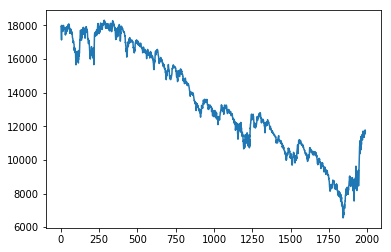

In [112]:
plt.plot(djdata['Adj Close'])

In [4]:
df = djdata[['Date', 'Adj Close']]
df['log_ret'] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))

/Users/wanxin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
train_set = df[df['Date'] < '2015-07-01']
test_set = df[df['Date'] >= '2015-07-01']

In [181]:
def construct_portfolio(prediction, prediction_type):
    """ Given prediction, create time series of holding weights.
    Input:
     prediction: predicted tuple for next period (day)， (ret, var)
                 when non-convergent, (0, 0.0001)
     prediction_type: {"directional", "quantity", 'sharpe',"custom"}
     
    Output:
     holding amount for next period (a negative amount means short)
    """
    
    if prediction_type not in ('directional','quantity', 'sharpe', 'custom'):
        print("invalid prediction type")
        return()
    elif prediction_type == 'directional':
        return np.sign(prediction[0])
    elif prediction_type == 'quantity':
        return prediction[0]
    elif prediction_type == 'sharpe':
        # in this case prediction has both return and var, use ratio
        return prediction[0] / prediction[1] ** 0.5
    elif prediction_type == 'custom':
        if abs(prediction[0]) < 0.001:
            return np.sign(0)
        else:
            return np.sign(prediction[0])
    


In [92]:
def predict_buynhold(date):
    """ Given a date, the function predicts the performance on that day 
     
    Output:
     prediction for that date
    """
    return (1)

######## Right now it's a place holder function

In [184]:
def portfolio_pnl(px_series):
    """ Given time series of px, and a strategy, output the pnl over time (starting at 0)
    Input:
     px_series: a two column matrix, the first column contains dates, the second the px on those dates
     strategy: a tuple of (model, feature_type, feature_num, prediction_type)
     
    Output:
     1. time series of pnl
     2. time series of cumulative pnl (time series of portfolio mv)
     3. mean and vol
    """
    
    # initialize (holding 0 on the first day):
    holding_period = np.shape(px_series)[0]
    pnl_vector = [0] * holding_period
    position_vector = [0] * holding_period    # holding amount for day t
    prediction_vector = [0] * holding_period  #prediction for day t made one day before
    vol_vector = [0] * holding_period  #prediction for day t made one day before
    
    
    # going one day at a time
    error_count = 0
    for t, px in enumerate(px_series.iloc[:holding_period-1, 1]):
        
        px_diff = px_series.iloc[t+1 , 1] - px
        # make prediction and portfolio decision
        try:
            pred_temp = predict_ARMA_GARCH(px_series.iloc[t+1 , 0])
            prediction_vector[t+1] = pred_temp[0]
            vol_vector[t+1] = pred_temp[1] ** 0.5
            # 1 # for buy and hold
            # predict_ARMA_GARCH(px_series.iloc[t+1 , 0])[0]  # for 
        except:
            prediction_vector[t+1] = 0
            vol_vector[t+1] = 0.01
            error_count += 1
            print(px_series.iloc[t+1 , 0], "did not converge!")
        position_vector[t+1] = construct_portfolio(pred_temp, 'sharpe') ## can change
        
        # pnl for the next day
        pnl_vector[t+1] = px_diff * position_vector[t+1]
    
    
    cumsum_pnl = np.cumsum(pnl_vector)
    
    return (prediction_vector, position_vector, pnl_vector, cumsum_pnl, error_count, vol_vector)
    
    

In [187]:
# pnl of arma-garch
(prediction_vector, position_vector, pnl_vector, cumsum_pnl, error_count, vol_vector) = portfolio_pnl(test_set)


2015-09-02 did not converge!
2015-09-11 did not converge!
2016-01-14 did not converge!
2016-02-09 did not converge!
2016-02-17 did not converge!
2016-02-22 did not converge!
2016-02-23 did not converge!
2016-02-24 did not converge!
2016-02-26 did not converge!
2016-03-01 did not converge!
2016-03-08 did not converge!
2016-03-14 did not converge!
2016-03-28 did not converge!
2016-03-31 did not converge!
2016-04-11 did not converge!
2016-04-14 did not converge!
2016-04-18 did not converge!
2016-04-20 did not converge!
2016-04-21 did not converge!
2016-05-02 did not converge!
2016-05-13 did not converge!
2016-05-20 did not converge!
2016-05-23 did not converge!
2016-05-31 did not converge!
2016-06-07 did not converge!
2016-06-23 did not converge!
2016-06-27 did not converge!


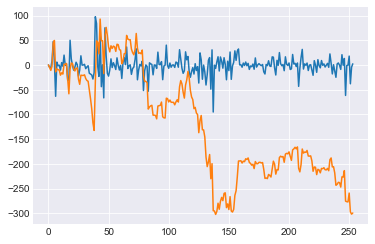

In [188]:
# sharpe
plt.plot(pnl_vector)
plt.plot(cumsum_pnl)

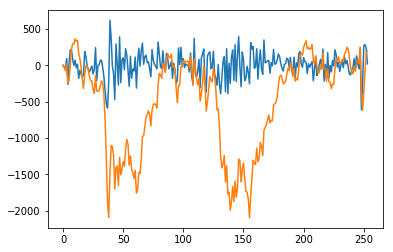

In [111]:
# buy and hold
plt.plot(pnl_vector)
plt.plot(cumsum_pnl)

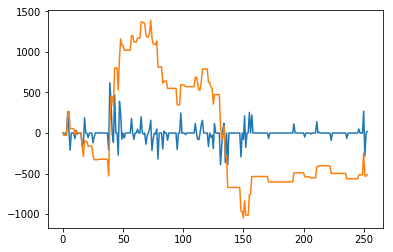

In [108]:
# custom
plt.plot(pnl_vector)
plt.plot(cumsum_pnl)

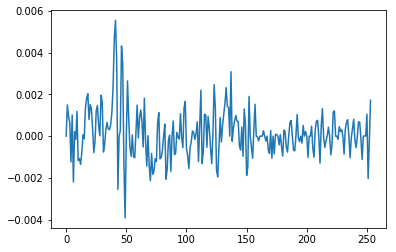

In [104]:
plt.plot(prediction_vector)

In [107]:
# pnl of arma-garch

(prediction_vector, position_vector, pnl_vector, cumsum_pnl, error_count) = portfolio_pnl(test_set.iloc[:, 0:2])

/Users/wanxin/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/wanxin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/Users/wanxin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/Users/wanxin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/Users/wanxin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/Users/wanxin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp

2015-09-02 did not converge!
2015-09-11 did not converge!


/Users/wanxin/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2016-01-14 did not converge!
2016-02-09 did not converge!
2016-02-17 did not converge!
2016-02-22 did not converge!
2016-02-23 did not converge!
2016-02-24 did not converge!
2016-02-26 did not converge!


/Users/wanxin/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2016-03-01 did not converge!
2016-03-08 did not converge!
2016-03-14 did not converge!
2016-03-28 did not converge!
2016-03-31 did not converge!
2016-04-11 did not converge!
2016-04-14 did not converge!
2016-04-18 did not converge!
2016-04-20 did not converge!
2016-04-21 did not converge!
2016-05-02 did not converge!
2016-05-13 did not converge!
2016-05-20 did not converge!
2016-05-23 did not converge!
2016-05-31 did not converge!
2016-06-07 did not converge!
2016-06-23 did not converge!
2016-06-27 did not converge!


/Users/wanxin/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [9]:
# Using code found online
# Citing code from:
# https://github.com/Auquan/Tutorials/blob/master/Time%20Series%20Analysis%20-%204.ipynb

def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()

        return

In [10]:
# calculate returns in the training period

TS = np.array(train_set['log_ret'])


In [11]:
# This piece of code for finding best ARMA-GARCH order is from:
# https://github.com/Auquan/Tutorials/blob/master/Time%20Series%20Analysis%20-%204.ipynb


def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(5) # [0,1,2,3,4]
    d_rng = range(5) # [0,1,2,3,4]
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl




In [12]:
res_tup = _get_best_model(TS[1:])

/Users/wanxin/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/wanxin/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/wanxin/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/wanxin/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/wanxin/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'a

aic: -10204.63602 | order: (4, 0, 3)


/Users/wanxin/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                   -1575.754
Mean Model:                   Constant Mean   Adj. R-squared:              -1575.754
Vol Model:                            GARCH   Log-Likelihood:               -1333.55
Distribution:      Standardized Student's t   AIC:                           2677.10
Method:                  Maximum Likelihood   BIC:                           2704.39
                                              No. Observations:                 1734
Date:                      Thu, May 09 2019   Df Residuals:                     1729
Time:                              14:23:25   Df Model:                            5
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0

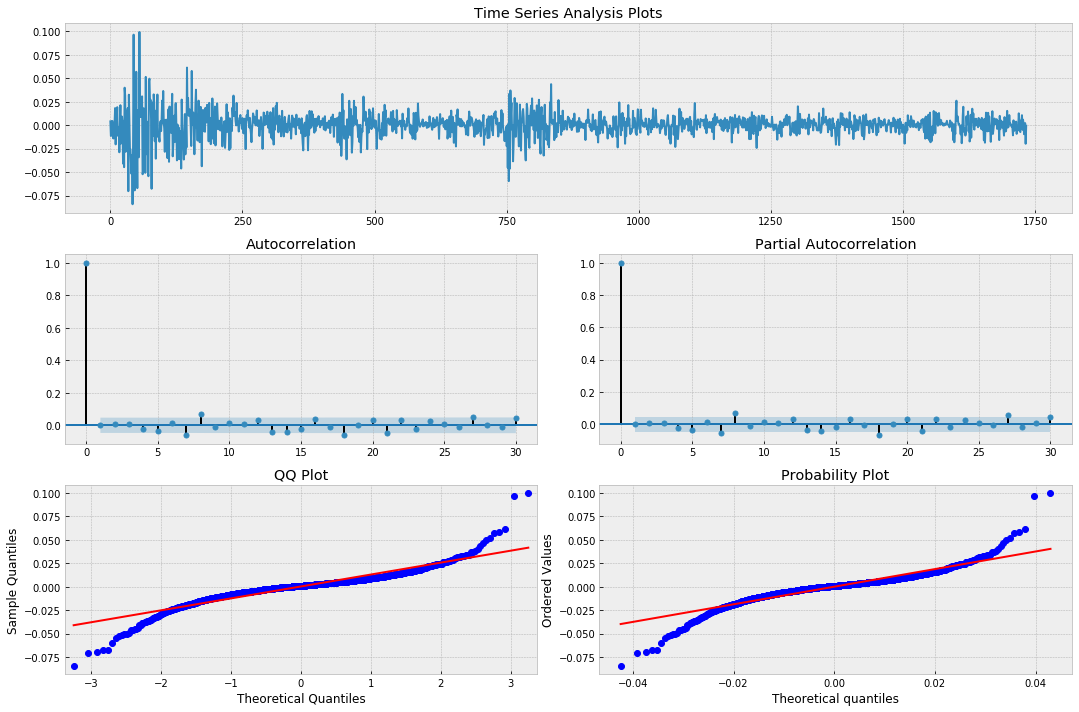

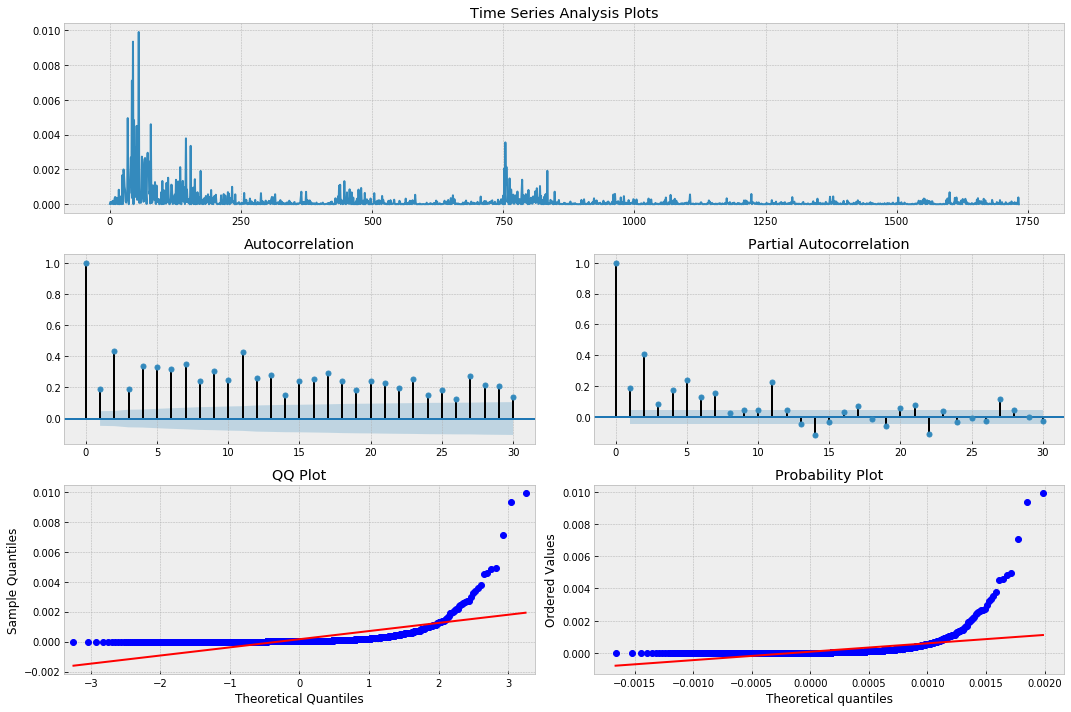

In [18]:
# This piece of code for finding best ARMA-GARCH order is from:
# https://github.com/Auquan/Tutorials/blob/master/Time%20Series%20Analysis%20-%204.ipynb


opt_arima_order = res_tup[1]
model = res_tup[2]

tsplot(model.resid, lags=30)
tsplot(model.resid**2, lags=30)


# Now we can fit the arch model using the best fit arima model parameters



# Using student T distribution usually provides better fit
am = arch_model(model.resid, p=1, q=1, dist='StudentsT')
res_garch = am.fit(update_freq=5, disp='off')
print(res_garch.summary())


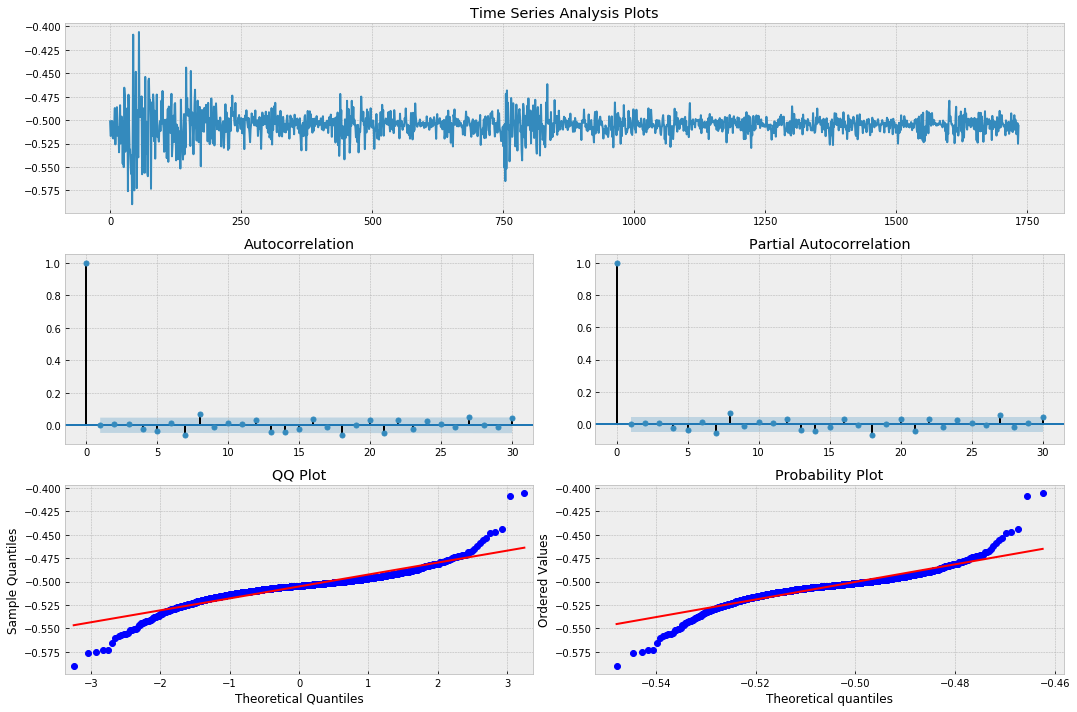

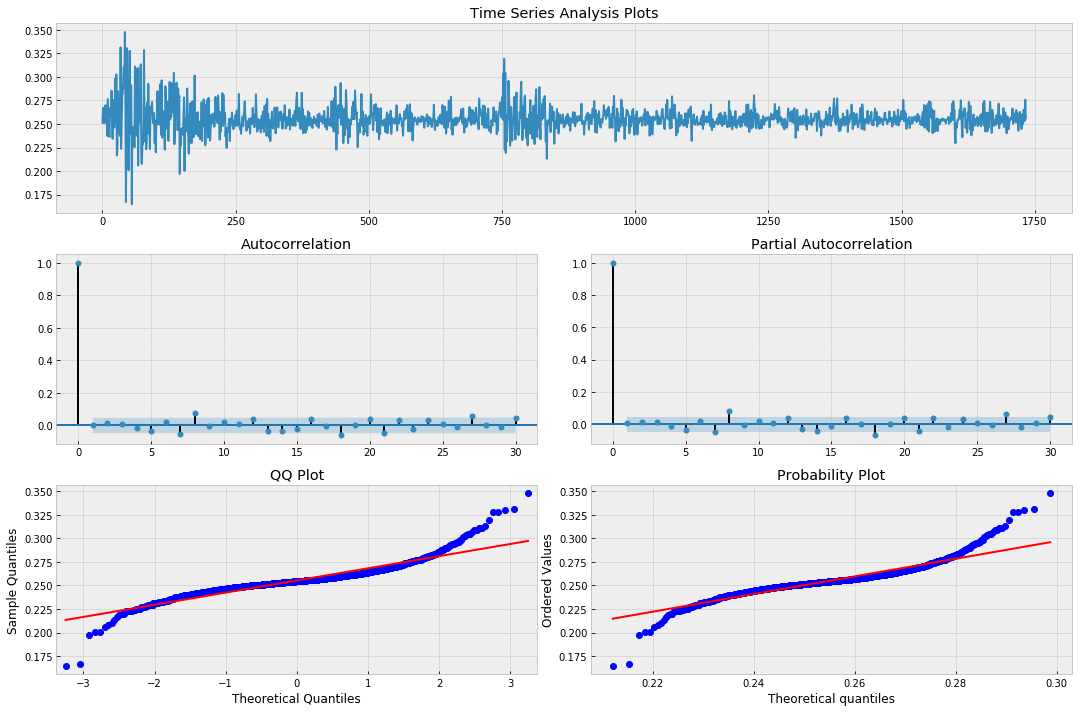

In [14]:
tsplot(res_garch.resid, lags=30)
tsplot(res_garch.resid**2, lags=30)

In [15]:
# ARMA_GARCH param selection

In [170]:
def predict_ARMA_GARCH(date_string, arima_order = opt_arima_order, garch_order = (1, 1), rolling_window = 1000):
    """ Given time, predict using ARMA(4,3)-GARCH(1,1)
    Input:
    1. date (as a string) to predict return / vol on

     Output:
     1. return / vol on that day
    """
    # get training period data

    temp_train_set = df[df['Date'] < date_string]

    # fit arima
    tmp_mean_mdl = smt.ARIMA(np.array(temp_train_set['log_ret'][len(temp_train_set) - rolling_window:]), order=arima_order).fit(method='mle', trend='nc', disp = -1)

    # fit arma(1,1) to the residual, becomes garch(1,1)
    tmp_vol_mdl = smt.ARIMA((tmp_mean_mdl.resid[len(tmp_mean_mdl.resid) - rolling_window : ]) ** 2, order=(1,0,1)).fit(method='mle', trend='nc', disp = -1)


    # predict return and vol
    pred_return = tmp_mean_mdl.forecast()[0]
    pred_vol = tmp_vol_mdl.forecast()[0]
    
    return(pred_return, pred_vol)

In [168]:
try:
    predict_ARMA_GARCH('2016-05-19')
except:
    print("ha")


ha


In [175]:
predict_ARMA_GARCH('2015-07-23')[0] / (predict_ARMA_GARCH('2016-05-19')[1])**0.5

-0.01728106321024049